![주식 투자](images/president_stock.png)

:::{.callout-info}
얻은 게 많은 프로젝트였다. 판다스 시리즈와 데이터프레임를 변형하며 마주친 오류를 해결하는 과정에서 인덱스를 이해할 수 있었다. 표에 자료를 입력하고 생성, 병합하는 것도 익숙해졌다. 데이터를 만지며 새로운 아이디어가 떠오르고 다시 데이터로 검증하는 과정이 꽤 흥미로웠다. 주식에 투자할 때마다 다른 사람들의 얘기를 반신반의하며 따라했었는데 처음으로 직접 투자 방법을 하나 만들어냈다. 대통령 임기에 맞춰 5년에 한 번 코스피 지수에 투자하고 수익률이 나면 분포 기간 비율만큼 매도한다. 논리가 매우 단순하고 명쾌하다. 따라하기도 간편하고 신경 쓸 것도 별로 없어 수시로 주가 그래프를 확인할 일도 없다. 그저 본업에 몰두하면 된다. 남은 문제는 데이터가 제시한 대로 따라할 수 있는 용기와 인내를 갖고 있는냐에 달려있다. 이 방법이 들어 맞을지 앞으로 5년이 기대된다.
:::

### 분석 과정

1. 프로젝트 제목 : (데이터 분석으로 본) 대통령과 주가
2. 팀원 : 3명
3. 주제 선정 : 대통령 취임 후 1, 2년 혹은 임기말 주가를 비교하는 언론 기사와 대통령이 투자한 펀드 수익률 기사를 보고 이를 검증해보고자 제안했다. 혹시 쓸만한 투자 방법을 찾을 수 있지 않을까 하는 기대도 했다.
4. 기간 : 2022년 5월 25일 - 5월 27일
5. 진행 : 첫 번째 프로젝트보다 준비 기간을 많이 주었다. 월요일 수업 말미에 주제를 정하도록 한 시간을 주었다. 수요일에는 개별 상담이 진행되어 20분 정도의 상담 시간 외에는 자유롭게 프로젝트를 준비할 수 있었고, 목요일 하루와 금요일 오전까지 여유가 있어 지난 번보다 좋은 결과를 내고 싶었다. 한 시간 동안 얘기해도 매력적인 주제가 떠오르지 않아 각자 생각해 보고 다음 날 다시 얘기하기로 했다. 집에 돌아가는 전철에서 전에 대통령 재임기간 별로 주가 그래프를 그려봤던 기억이 나서 그것을 발전시켜보면 좋겠다고 생각해 카톡방에 올렸더니 모두 좋다고 했다. financeDataReader로 주가를 불러오는 소스를 팀원에게 전달하고 각자 전처리 하고 분석을 해보도록 했다. 분석 결과를 슬라이드로 만든 후 내가 발표했다. 발표 전 잘한 팀을 투표로 선정했는데 우리 팀이 1등을 했다. 투자하는 데 도움이 될 것 같다는 얘기도 들었다.
6. 데이터 선정
  1. 주가는 finaceDataReader 라이브러리를 사용해 가져왔다.
  1. 라이브러리 개발자가 제공한 Tutorial 소스 코드가 필요한 데이터를 가져오는 소스를 작성하는 데 큰 도움이 되었다.
7. 데이터 전처리

![주식 투자](images/president_stock01.png)

```python
presidents = [['노태우','1988-02-25','1993-02-24'],
              ['김영삼','1993-02-25','1998-02-24'],
              ['김대중','1998-02-25','2003-02-24'],
              ['노무현','2003-02-25','2008-02-24'],
              ['이명박','2008-02-25','2013-02-24'],
              ['박근혜','2013-02-25','2017-03-10'],
              ['문재인','2017-05-10','2022-05-09'],
              ['윤석열','2022-05-10',date.today().isoformat()]]
 
# 주가 자료 가져오기 - 대통령 재임기간 별 종가
kospi = [ fdr.DataReader('ks11', start, end)['Close'] for name, start, end in presidents ]
 
# 리스트 내의 시리즈를 데이터프레임으로 변환
# 1. 리스트 길이만큼 동적으로 변수 생성
# 2. 시리즈 => 데이터프레임 => 생성된 변수에 저장
for i in range(len(kospi)):
    globals()['p_'+str(i+1)]=pd.DataFrame(kospi[i])
 
# 동적으로 생성한 데이터프레임의 날짜 인덱스를 Date 컬럼으로 저장
for i in range(len(kospi)):
    temp_df = globals()['p_'+str(i+1)]
    temp_df['Date']=temp_df.index 
 
# 동적으로 생성한 데이터프레임의 인덱스를 순번으로 초기화
# 컬럼명 변경
for i in range(len(kospi)):
    temp_df = globals()['p_'+str(i+1)]
    temp_df.index = range(len(temp_df))
    temp_df.columns = [[presidents[i][0]+'date',presidents[i][0]]]
 
# 동적으로 생성한 데이터프레임 합치기
# 1. 각각의 데이터 프레임을 리스트로 합치기
# 2. pd.concat을 이용해 list => 데이터프레임
temp_list = []
for i in range(len(kospi)):
    temp_df = globals()['p_'+str(i+1)]
    temp_list.append(temp_df)
 
df_all = pd.concat(temp_list,axis=1)
```

1. 노태우 정부 이후 KOSPI 종가를 가져와 대통령 재임기간과 날짜별 종가를 컬럼으로 만들었다.
1. 수익률 비교를 위해 취임 후 첫 날 주가를 0으로 설정했다. 수식: ( 종가 / 첫날 종가 ) - 1

### 부딪힌 문제와 대응

1. 판다스는 인덱스를 기준으로 데이터를 입력하고 테이블을 병합한다는 것을 몰랐다. 원자료의 인덱스가 날짜로 되어 있고 대통령 임기마다 인덱스가 모두 다르기 때문에 컬럼으로 붙지 않았다.
1. 처음에는 원자료에 컬럼을 하나 덧붙이고 대통령 임기에 해당하는 날짜에 해당 대통령 이름을 넣으려고 시도했다. 하지만 새로운 컬럼을 만들며 일부 행에만 자료를 넣는 것은 되지 않았다. 새로운 컬럼을 만들 때는 모두 비어 있던지, 모두 채워져 있어야 했다. 
1. 먼저 새로운 컬럼을 결측치로 만들고 나서 재임기간 행에 해당 대통령 이름을 입력하면 쉽게 해결되는 데 당시에는 이걸 몰랐다.
1. 튜토리얼에 나온 코드를 활용해 재임기간별 종가를 리스트로 받아오고 바로 데이터프레임으로 변환하려고 했으나 되지 않았다. 이유는 역시 인덱스가 다르기 때문이었다. 
1. financdDataReader로 가져온 자료는 시리즈로 되어 있고, 인덱스가 모두 날짜로 되어있기 때문이었다. 해결책은 인덱스를 컬럼으로 바꾸고 단순 나열된 번호로 인덱스를 재설정하는 것이었다. 
1. 하지만, 인덱스를 컬럼으로 바꾸려면 시리즈를 데이터프레임으로 바꾸어야 하고 그때마다 데이터프레임 변수를 생성해야 한다. 즉 동적으로 1. 변수를 만드는 방법을 알아햐 했다. 선생님께 질문해 해결했다. globals()[]를 이용하면 된다.
1. 동적으로 생성한 데이터프레임을 다시 리스트로 묶고 pd.concat()으로 병합해 위 표를 완성했다.
1. 이후론 멀티 인덱스를 만날 때까지는 별다른 문제 없이 착착 진행되었다.

### 분석 1

대통령 재임기간에서 공통된 패턴을 찾는 것은 실패했다. 하지만 취임 직후에 매수하면 수익 낼 기회는 많다는 것을 발견했다.

1. 대통령 재임기간 별 패턴 분석: 아래 도표에 나타나듯이 일정한 패턴을 발견할 수 없다.(그림-1)
1. 겹쳐 놓고 봐도 일년씩 나누어 봐도 일정한 패턴이 없어 보인다.(그림-2)
1. 하지만, 취임 직후에 매수했다면 수익을 낼 수 있는 기회는 많았다.(그림-3)

![그림1](images/president_stock02.png)
![그림1](images/president_stock03.png)
![그림1](images/president_stock04.png)

###  분석 2

대통령이 펀드 투자한 시점에 KOSPI 지수를 매수하면 70% 이상의 수익을 낼 수 있다. 단, 매도 시점을 잘 찾아야 한다.

1. 대통령 펀드 투자일 종가와 이후 최고점까지의 기간과 수익률을 구했다.
1. 최고점 1년 후 종가와 수익률을 구해보니  매도 시점이 얼마나 중요한지를 볼 수 있었다.

![분석2](images/president_stock05.png)

### 분석 3

재임기간 내 수익률별 기간 분포를 비율로 계산 하여 비율 별 분할 매도 방법 제안

1. 수익률 별 영업일 수 분포를 표로 집계 후 백분률로 변환
1. 대통령 별로 수익률 기간 분포를 파이 차트와 막대 그래프로 표시
1. 전체적으로 보면 대통령 취임 직후에 주식을 매수하면
  1. 10% 이상 수익을 낼 기회는 51.4%나 된다.
  1. 20% 이상 수익을 낼 기회도 39.2%나 된다.
  1. 반대로 손해를 볼 경우는 28.4%다.
1. 최종 결론은 이 글 맨 위에 있다.

![](images/president_stock06.png)
<table>
    <tr><td>
        <img src="images/president_stock07.png"></td><td>
        <img src="images/president_stock08.png">)</td></tr>
    <tr><td>
        <img src="images/president_stock09.png"></td><td>
        <img src="images/president_stock10.png"></td></tr>
</table>

### 배운 점 및 차후 과제

1. 판다스를 자유롭게 사용할 수 있어야 원하는 모양으로 표를 만들 수 있다. 판다스가 움직이는 원리를 알아야 예상치 못한 오류를 내뿜는 것을 막을 수 있다. 판다스만을 다룬 책을 찾아 공부해야겠다.
1. 원리를 모르고 시각화 도구를 사용하니 원하는 모양으로 만들어지지 않았다. 구글링도 원리를 알아야 활용할 수 있다. 프로젝트 준비 시간을 주느라고 matplotlib 수업이 줄어든 게 무척 아쉽다. 주말을 이용해 유튜브 강의나 책으로 공부해야겠다.
1. 모든 걸 파이썬으로 해결하려 하지 말자. 데이터를 엑셀로 보내 엑셀에서 그래프를 그리는 게 편리할 때도 있다. 파이 차트에서 숫자가 겹쳐 제대로 보이지 않는 것을 코드로 조정하는 게 무척 번거롭다. 엑셀에서 마우스로 움직이는 게 더 나았다. 필요에 따라 도구를 적절히 사용하자. 주객이 전도되면 안 된다.

### 코드

라이브러리 사용법

https://github.com/FinanceData/FinanceDataReader

- 설치: pip install finance-datareader
- 업데이트 : pip install -U finance-datareader

- 잘 되던 데이터 가져오기가 안 되면 ip가 차단당했을 수 있으니 휴대폰 핫스팟에 연결해서 해 본다.

변수 정리
- df_kospi : financeDataReader 원자료
- presidents : 대통령, 첫날, 마지막날, 총거래일 리스트 변수
- kospi : 대통령 임기별 종가 리스트 변수
- df_all : 대통령 임기와 주가를 컬럼으로 나열한 변수
- df_all_rate : df_all 변수를 수익률로 변환
- df_freq : 수익률별 영업일수
- df_rate : 수익률별 영업일수 비율

In [ ]:
pip install finance-datareader

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline

plt.rcParams['font.family']='Malgun Gothic, AppleGothic'
plt.rcParams['font.size']=11.0
plt.rcParams['axes.unicode_minus']=False

In [2]:
# kospi 1980년 이후 오늘까지. 코스피(ks11),코스닥(kq11)
df_kospi = fdr.DataReader('ks11', '1980')
# df_kospi

In [3]:
# 연도별 영업일 수
year_busi = []

for i in range(1988,2023):
    year_busi.append( [ i, df_kospi.loc[str(i)]['Close'].count() ])

for x, y in year_busi:
    print(f'{x}년: {y} 영업일')

1988년: 293 영업일
1989년: 289 영업일
1990년: 291 영업일
1991년: 292 영업일
1992년: 294 영업일
1993년: 296 영업일
1994년: 296 영업일
1995년: 293 영업일
1996년: 293 영업일
1997년: 292 영업일
1998년: 292 영업일
1999년: 249 영업일
2000년: 241 영업일
2001년: 246 영업일
2002년: 244 영업일
2003년: 247 영업일
2004년: 249 영업일
2005년: 249 영업일
2006년: 247 영업일
2007년: 246 영업일
2008년: 248 영업일
2009년: 253 영업일
2010년: 251 영업일
2011년: 248 영업일
2012년: 248 영업일
2013년: 248 영업일
2014년: 245 영업일
2015년: 248 영업일
2016년: 246 영업일
2017년: 243 영업일
2018년: 244 영업일
2019년: 246 영업일
2020년: 248 영업일
2021년: 248 영업일
2022년: 98 영업일


In [4]:
presidents = [['노태우','1988-02-25','1993-02-24'],
              ['김영삼','1993-02-25','1998-02-24'],
              ['김대중','1998-02-25','2003-02-24'],
              ['노무현','2003-02-25','2008-02-24'],
              ['이명박','2008-02-25','2013-02-24'],
              ['박근혜','2013-02-25','2017-03-10'],
              ['문재인','2017-05-10','2022-05-09'],
              ['윤석열','2022-05-10',date.today().isoformat()]]

In [5]:
# 주가 자료 가져오기 - 대통령 재임기간 별 종가
kospi = [ fdr.DataReader('ks11', start, end)['Close'] for name, start, end in presidents ]

In [6]:
# 리스트 내의 시리즈를 데이터프레임으로 변환
# 1. 리스트 길이만큼 동적으로 변수 생성
# 2. 시리즈 => 데이터프레임 => 생성된 변수에 저장

for i in range(len(kospi)):
    globals()['p_'+str(i+1)]=pd.DataFrame(kospi[i])

In [7]:
# 동적으로 생성한 데이터프레임의 날짜 인덱스를 Date 컬럼으로 저장

for i in range(len(kospi)):
    temp_df = globals()['p_'+str(i+1)]
    temp_df['Date']=temp_df.index 

In [8]:
# 컬럼 순서를 Date, Close로 변경 (의문: 위 코드와 같은 cell에서 실행하면 바뀌지 않는다. 왜그럴까?)
# for i in range(len(kospi)):
#     tmp_df = globals()['p_'+str(i+1)]
#     tmp_df = tmp_df[['Date','Close']]

p_1=p_1[['Date','Close']]
p_2=p_2[['Date','Close']]
p_3=p_3[['Date','Close']]
p_4=p_4[['Date','Close']]
p_5=p_5[['Date','Close']]
p_6=p_6[['Date','Close']]
p_7=p_7[['Date','Close']]
p_8=p_8[['Date','Close']]

In [9]:
# 동적으로 생성한 데이터프레임의 인덱스를 순번으로 초기화
# 컬럼명 변경

for i in range(len(kospi)):
    temp_df = globals()['p_'+str(i+1)]
    temp_df.index = range(len(temp_df))
    temp_df.columns = [[presidents[i][0]+'date',presidents[i][0]]]

In [10]:
# 동적으로 생성한 데이터프레임 합치기
# 1. 각각의 데이터 프레임을 리스트로 합치기
# 2. pd.concat을 이용해 list => 데이터프레임

temp_list = []
for i in range(len(kospi)):
    temp_df = globals()['p_'+str(i+1)]
    temp_list.append(temp_df)

df_all = pd.concat(temp_list,axis=1)
df_all.head()

,노태우date,노태우,김영삼date,김영삼,김대중date,김대중,노무현date,노무현,이명박date,이명박,박근혜date,박근혜,문재인date,문재인,윤석열date,윤석열
0,1988-02-26,635.10,1993-02-25,655.61,1998-02-25,516.38,2003-02-25,592.25,2008-02-25,1709.13,2013-02-25,2009.52,2017-05-10,2270.12,2022-05-10,2596.56
1,1988-02-27,633.23,1993-02-26,644.70,1998-02-26,524.98,2003-02-26,590.26,2008-02-26,1709.13,2013-02-26,2000.01,2017-05-11,2296.37,2022-05-11,2592.27
2,1988-02-29,612.35,1993-02-27,642.96,1998-02-27,548.42,2003-02-27,582.46,2008-02-27,1720.89,2013-02-27,2004.04,2017-05-12,2286.02,2022-05-12,2550.08
3,1988-03-02,608.24,1993-03-02,633.73,1998-02-28,558.98,2003-02-28,575.43,2008-02-28,1736.17,2013-02-28,2026.49,2017-05-15,2290.65,2022-05-13,2604.24
4,1988-03-03,613.01,1993-03-03,632.99,1998-03-02,574.35,2003-03-03,590.04,2008-02-29,1711.62,2013-03-04,2013.15,2017-05-16,2295.33,2022-05-16,2596.58


In [11]:
df_all.to_csv('대통령_재임기간_중_코스피종가.csv', encoding='cp949')

In [12]:
# 대통령 재임기간 총 영업일을 presidnets 변수에 추가

# business_days = df_all.iloc[:,[1,3,5,7,9,11,13,15]].notnull().sum()
# for i in range(len(business_days)):
#     if presidents[i][3]:
#         break
#     else:
#         presidents[i].append(business_days[i])
# presidents

In [13]:
# 대통령별 수익률 상대 비교 위해 데이터프레임 복사

df_all_rate = df_all.copy()

In [14]:
# 첫번째 영업일 종가를 0으로 설정

df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]] = df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]] / df_all_rate.iloc[0,[1,3,5,7,9,11,13,15]] -1


In [15]:
# 백분율로 표시(소수점 2자리까지)

df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]] = round(df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]*100, 2)

In [16]:
df_all_rate.rename(columns={'노태우':'노태우(%)', '김영삼':'김영삼(%)', '김대중':'김대중(%)','노무현':'노무현(%)', 
                        '이명박':'이명박(%)', '박근혜':'박근혜(%)', '문재인':'문재인(%)','윤석열':'윤석열(%)'})

,노태우date,노태우(%),김영삼date,김영삼(%),김대중date,김대중(%),노무현date,노무현(%),이명박date,이명박(%),박근혜date,박근혜(%),문재인date,문재인(%),윤석열date,윤석열(%)
0,1988-02-26,0.00,1993-02-25,0.00,1998-02-25,0.00,2003-02-25,0.00,2008-02-25,0.00,2013-02-25,0.00,2017-05-10,0.00,2022-05-10,0.00
1,1988-02-27,-0.29,1993-02-26,-1.66,1998-02-26,1.67,2003-02-26,-0.34,2008-02-26,0.00,2013-02-26,-0.47,2017-05-11,1.16,2022-05-11,-0.17
2,1988-02-29,-3.58,1993-02-27,-1.93,1998-02-27,6.20,2003-02-27,-1.65,2008-02-27,0.69,2013-02-27,-0.27,2017-05-12,0.70,2022-05-12,-1.79
3,1988-03-02,-4.23,1993-03-02,-3.34,1998-02-28,8.25,2003-02-28,-2.84,2008-02-28,1.58,2013-02-28,0.84,2017-05-15,0.90,2022-05-13,0.30
4,1988-03-03,-3.48,1993-03-03,-3.45,1998-03-02,11.23,2003-03-03,-0.37,2008-02-29,0.15,2013-03-04,0.18,2017-05-16,1.11,2022-05-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,NaT,NaN,1998-02-19,-21.68,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1465,NaT,NaN,1998-02-20,-20.36,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1466,NaT,NaN,1998-02-21,-19.32,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1467,NaT,NaN,1998-02-23,-17.17,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [17]:
df_all_rate.head(10)

,노태우date,노태우,김영삼date,김영삼,김대중date,김대중,노무현date,노무현,이명박date,이명박,박근혜date,박근혜,문재인date,문재인,윤석열date,윤석열
0,1988-02-26,0.00,1993-02-25,0.00,1998-02-25,0.00,2003-02-25,0.00,2008-02-25,0.00,2013-02-25,0.00,2017-05-10,0.00,2022-05-10,0.00
1,1988-02-27,-0.29,1993-02-26,-1.66,1998-02-26,1.67,2003-02-26,-0.34,2008-02-26,0.00,2013-02-26,-0.47,2017-05-11,1.16,2022-05-11,-0.17
2,1988-02-29,-3.58,1993-02-27,-1.93,1998-02-27,6.20,2003-02-27,-1.65,2008-02-27,0.69,2013-02-27,-0.27,2017-05-12,0.70,2022-05-12,-1.79
3,1988-03-02,-4.23,1993-03-02,-3.34,1998-02-28,8.25,2003-02-28,-2.84,2008-02-28,1.58,2013-02-28,0.84,2017-05-15,0.90,2022-05-13,0.30
4,1988-03-03,-3.48,1993-03-03,-3.45,1998-03-02,11.23,2003-03-03,-0.37,2008-02-29,0.15,2013-03-04,0.18,2017-05-16,1.11,2022-05-16,0.00
5,1988-03-04,-3.02,1993-03-04,-5.09,1998-03-03,10.56,2003-03-04,-2.65,2008-03-03,-2.19,2013-03-05,0.35,2017-05-17,1.01,2022-05-17,0.92
6,1988-03-05,-2.63,1993-03-05,-6.11,1998-03-04,10.92,2003-03-05,-5.40,2008-03-04,-1.93,2013-03-06,0.56,2017-05-18,0.74,2022-05-18,1.13
7,1988-03-07,-3.21,1993-03-06,-7.58,1998-03-05,3.74,2003-03-06,-6.23,2008-03-05,-1.87,2013-03-07,-0.25,2017-05-19,0.81,2022-05-19,-0.16
8,1988-03-08,-4.99,1993-03-08,-4.57,1998-03-06,1.19,2003-03-07,-7.81,2008-03-06,-0.68,2013-03-08,-0.17,2017-05-22,1.49,2022-05-20,1.65
9,1988-03-09,-3.66,1993-03-09,-4.48,1998-03-07,1.86,2003-03-10,-8.11,2008-03-07,-2.64,2013-03-11,-0.31,2017-05-23,1.83,2022-05-23,1.96


In [18]:
df_all_rate.to_csv('대통령재임기간별수익률.csv')

In [19]:
len(df_all_rate.columns)

16

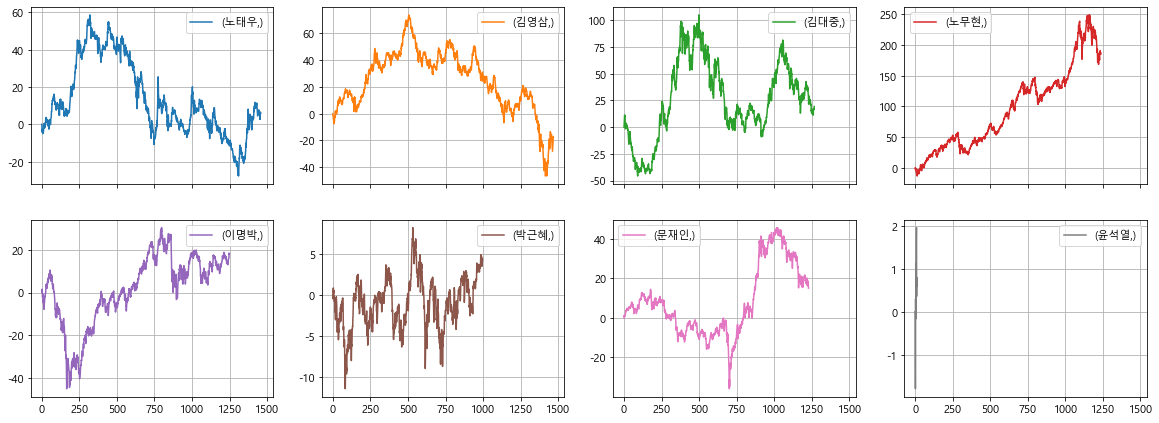

In [20]:
# x,y축 값을 절대값으로 고정하려면 xlim=(0,50), ylim=(-50, 250)
df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]].plot(subplots=True, layout=(4,4), figsize=(20,15), grid='dotted');

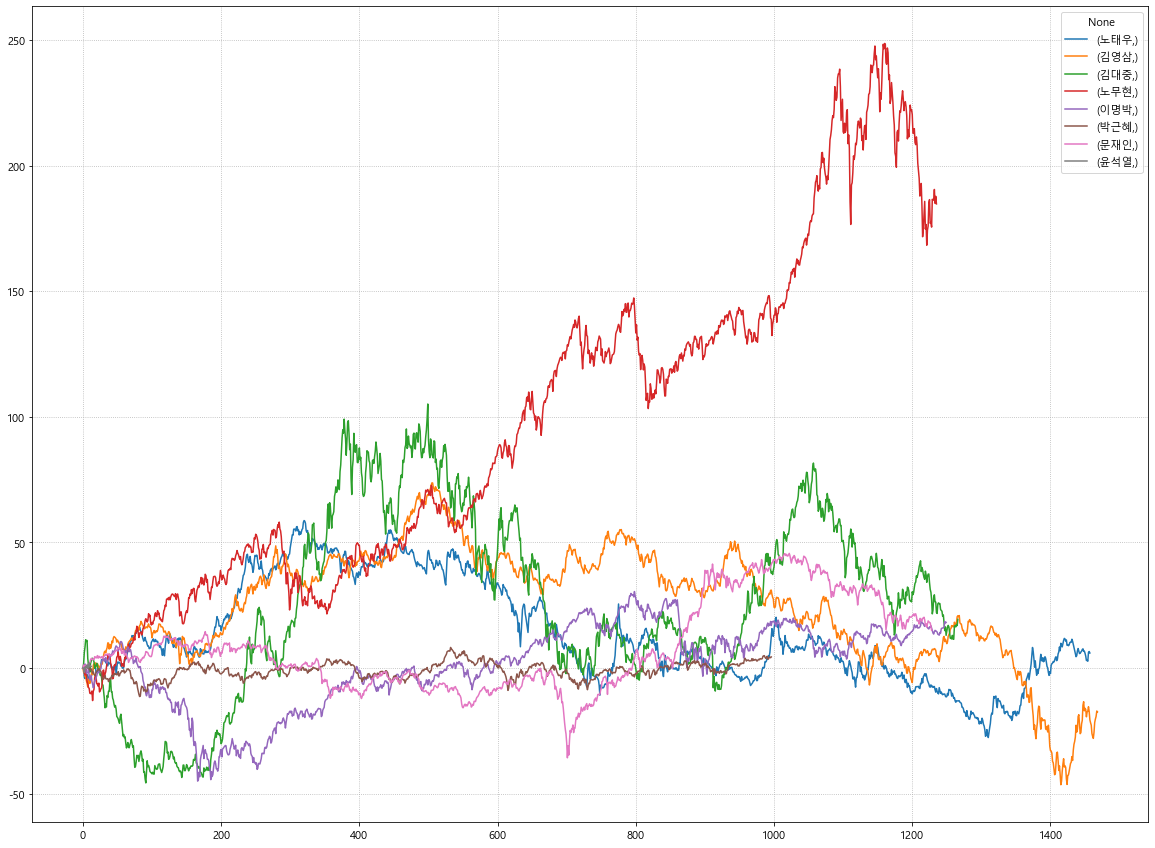

In [21]:
df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]].plot(figsize=(20,15));
plt.grid(linestyle='dotted')

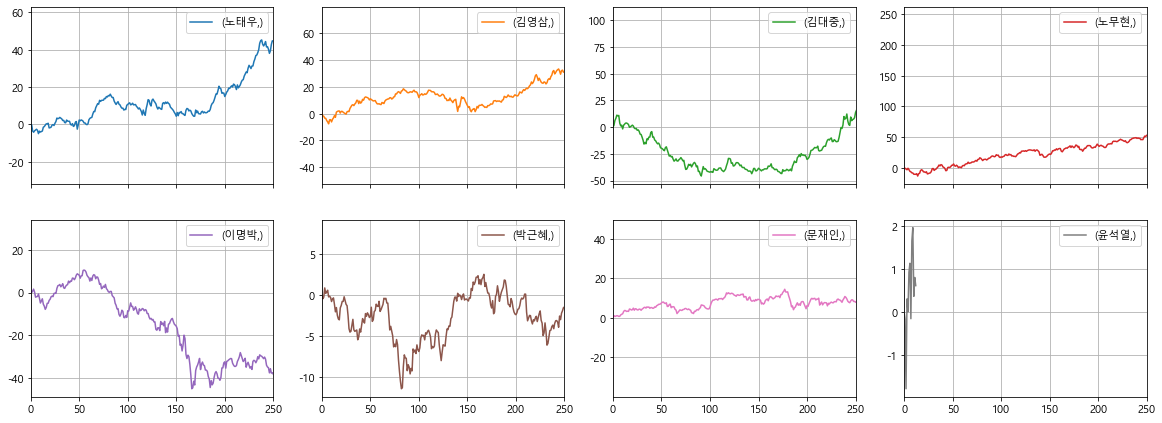

In [22]:
# 재임기간 중 첫 250 영업일(약 1년)
df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]].plot(subplots=True, layout=(4,4), xlim=(0,250), figsize=(20,15), grid='dotted');

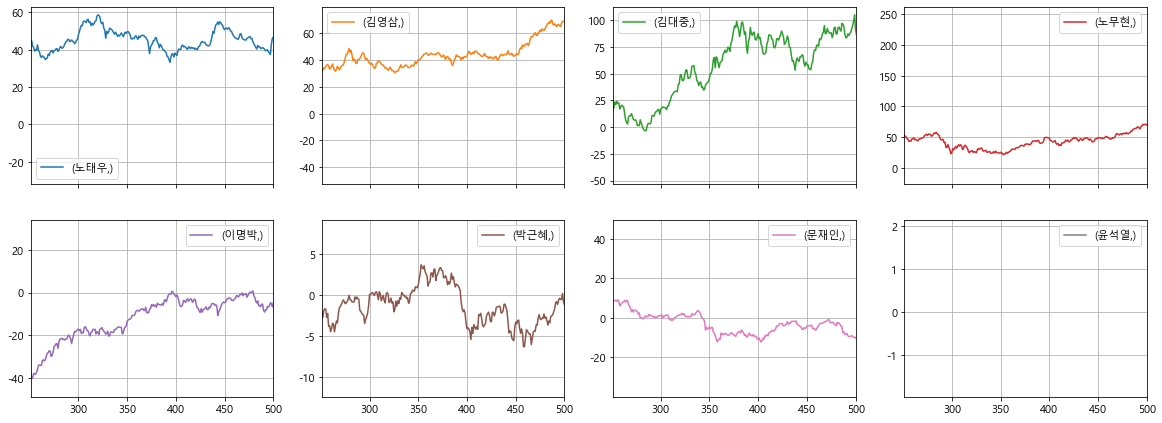

In [23]:
# 재임기간 중 2년차 250-500 영업일(약 1년)
df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]].plot(subplots=True, layout=(4,4), xlim=(251,500), figsize=(20,15), grid='dotted');

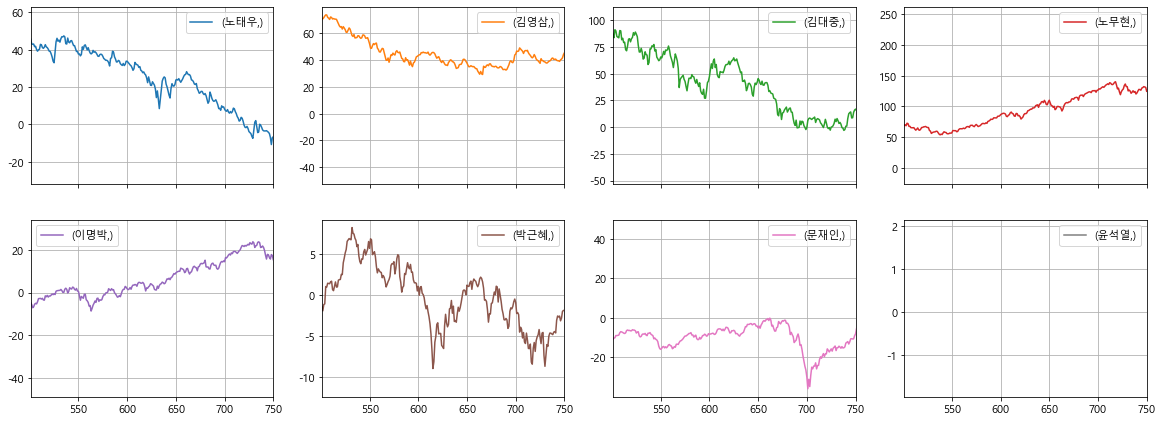

In [24]:
# 재임기간 중 3년차 500-750 영업일(약 1년)
df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]].plot(subplots=True, layout=(4,4), xlim=(501,750), figsize=(20,15), grid='dotted');

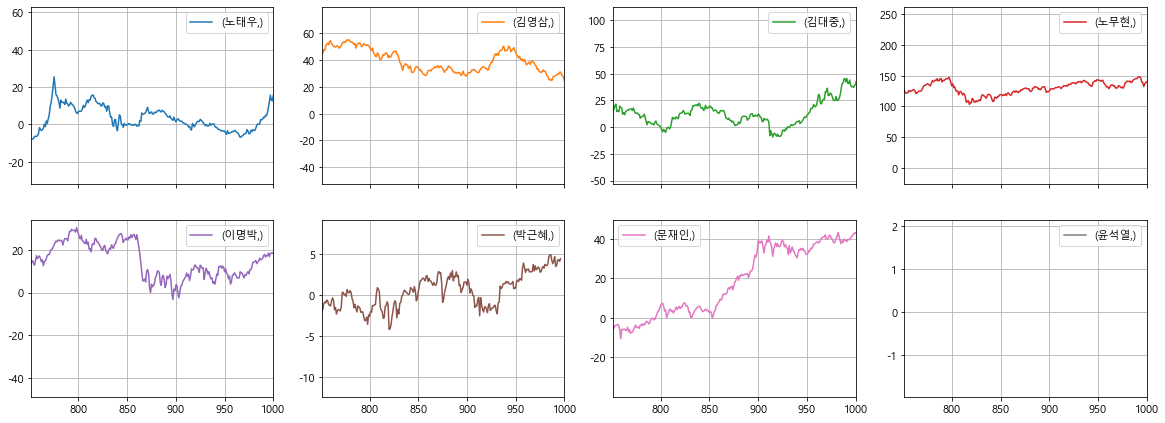

In [25]:
# 재임기간 중 4년차 750-1000 영업일(약 1년)
df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]].plot(subplots=True, layout=(4,4), xlim=(751,1000), figsize=(20,15), grid='dotted');

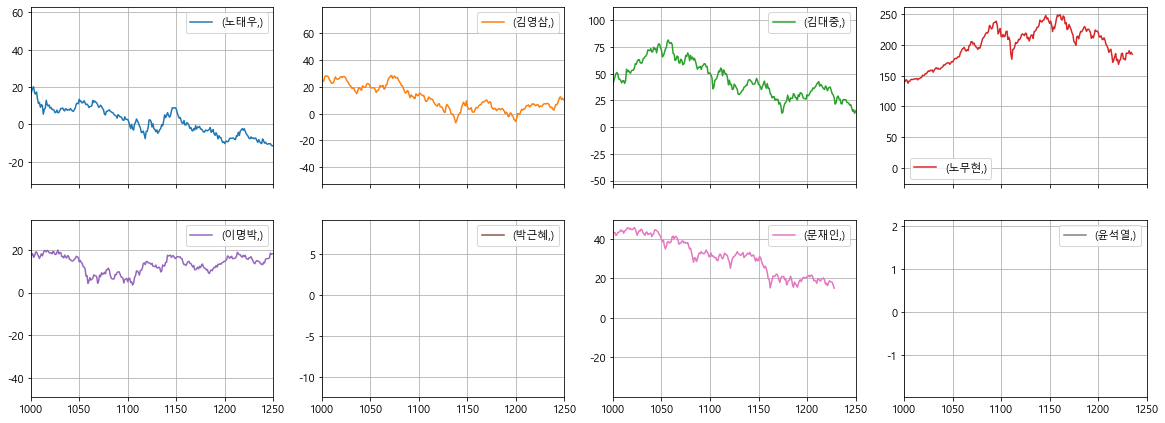

In [26]:
# 재임기간 중 5년차 1000-1250 영업일(약 1년)
df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]].plot(subplots=True, layout=(4,4), xlim=(1000,1250), figsize=(20,15), grid='dotted');

### 재임기간 수익률 구간별 비교

In [27]:
#  취임일 직후 대비 10%, 20%,....,150% 이상인 영업일 수

freq_plus = []
num_plus = [0,10,20,30,40,50,100,150,200]
for i in range(len(num_plus)):
    if i < len(num_plus)-1:
#         print(num_plus[i], num_plus[i+1])
        temp = ((df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]>=num_plus[i])&(df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]<num_plus[i+1])).sum()
#         print(temp)
        freq_plus.append(temp)
    else:
#         print(num_plus[i])
        temp2=(df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]>=num_plus[i]).sum()
#         print(temp2)
        freq_plus.append(temp2)
# freq_plus

In [28]:
#  취임일 직후 대비 -50%, -40%,....,0% 미만인 영업일 수

freq_minus = []
num_minus = list(range(0, -60, -10))

for i in range(len(num_minus)):
    if i < len(num_minus)-1:
#         print(num_minus[i], num_minus[i+1])
        temp1 = ((df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]<=num_minus[i])&(df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]>num_minus[i+1])).sum()
#         print(temp1)
        freq_minus.append(temp1)
    else:
#         print('dd',num_minus[i])
        temp2=(df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]<=num_minus[i]).sum()
#         print(temp2)
        freq_minus.append(temp2)

# freq_minus

In [29]:
# -10% ~ 10% 수익률
# freq_zero = ((df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]> -10) & (df_all_rate.iloc[:,[1,3,5,7,9,11,13,15]]< 10)).sum()
# freq_zero.name='-10%~10%'
# freq_zero

In [37]:
# 플러스 수익률 영업일수
df_freq_plus = pd.concat(freq_plus, axis=1)
df_freq_plus.columns=['0~10%','10%','20%','30%','40%','50%','100%','150%','200%<']
df_freq_plus

,0~10%,10%,20%,30%,40%,50%,100%,150%,200%<
노태우,422,188,71,123,217,47,0,0,0
김영삼,221,245,120,304,285,140,0,0,0
김대중,174,169,90,109,110,349,1,0,0
노무현,37,37,98,101,135,202,373,90,127
이명박,299,341,108,1,0,0,0,0,0
박근혜,375,0,0,0,0,0,0,0,0
문재인,357,107,62,168,74,0,0,0,0
윤석열,10,0,0,0,0,0,0,0,0


In [38]:
# 마이너스 수익률 영업일수
df_freq_minus = pd.concat(freq_minus, axis=1)
df_freq_minus.columns=['-10%~0','-10%','-20%','-30%','-40%','<-50%']
df_freq_minus=df_freq_minus[['<-50%','-40%','-30%','-20%','-10%','-10%~0']]
df_freq_minus

,<-50%,-40%,-30%,-20%,-10%,-10%~0
노태우,0,0,0,23,97,271
김영삼,0,13,23,38,27,54
김대중,0,41,80,37,38,71
노무현,0,0,0,0,4,33
이명박,0,13,87,44,102,257
박근혜,0,0,0,0,3,622
문재인,0,0,3,15,94,352
윤석열,0,0,0,0,0,5


In [39]:
# 수익률별 영업일수 합치기
df_freq = pd.concat([df_freq_minus, df_freq_plus], axis=1)
df_freq

,<-50%,-40%,-30%,-20%,-10%,-10%~0,0~10%,10%,20%,30%,40%,50%,100%,150%,200%<
노태우,0,0,0,23,97,271,422,188,71,123,217,47,0,0,0
김영삼,0,13,23,38,27,54,221,245,120,304,285,140,0,0,0
김대중,0,41,80,37,38,71,174,169,90,109,110,349,1,0,0
노무현,0,0,0,0,4,33,37,37,98,101,135,202,373,90,127
이명박,0,13,87,44,102,257,299,341,108,1,0,0,0,0,0
박근혜,0,0,0,0,3,622,375,0,0,0,0,0,0,0,0
문재인,0,0,3,15,94,352,357,107,62,168,74,0,0,0,0
윤석열,0,0,0,0,0,5,10,0,0,0,0,0,0,0,0


In [33]:
df_freq.to_csv('대통령재임기간내수익률별영업일수.csv')

In [40]:
# 복사해서 합계
df_freq_sum_temp = df_freq.copy()
# 행 합계
df_freq_sum_temp['합계'] = df_freq_sum_temp.sum(axis=1)
# 열 평균
df_freq_sum_temp.loc['평균'] = df_freq_sum_temp.sum(axis=0)
df_freq_sum_temp

,<-50%,-40%,-30%,-20%,-10%,-10%~0,0~10%,10%,20%,30%,40%,50%,100%,150%,200%<,합계
"(노태우,)",0,0,0,23,97,271,422,188,71,123,217,47,0,0,0,1459
"(김영삼,)",0,13,23,38,27,54,221,245,120,304,285,140,0,0,0,1470
"(김대중,)",0,41,80,37,38,71,174,169,90,109,110,349,1,0,0,1269
"(노무현,)",0,0,0,0,4,33,37,37,98,101,135,202,373,90,127,1237
"(이명박,)",0,13,87,44,102,257,299,341,108,1,0,0,0,0,0,1252
"(박근혜,)",0,0,0,0,3,622,375,0,0,0,0,0,0,0,0,1000
"(문재인,)",0,0,3,15,94,352,357,107,62,168,74,0,0,0,0,1232
"(윤석열,)",0,0,0,0,0,5,10,0,0,0,0,0,0,0,0,15
평균,0,67,193,157,365,1665,1895,1087,549,806,821,738,374,90,127,8934


In [41]:
# 복사해서 합계
df_freq_sum = df_freq.copy()
# 행 합계
# df_freq_sum['합계'] = df_freq_sum.sum(axis=1)
# 열 평균
df_freq_sum.loc['평균'] = df_freq_sum.mean(axis=0)
df_freq_sum

,<-50%,-40%,-30%,-20%,-10%,-10%~0,0~10%,10%,20%,30%,40%,50%,100%,150%,200%<
"(노태우,)",0.0,0.000,0.000,23.000,97.000,271.000,422.000,188.000,71.000,123.00,217.000,47.00,0.00,0.00,0.000
"(김영삼,)",0.0,13.000,23.000,38.000,27.000,54.000,221.000,245.000,120.000,304.00,285.000,140.00,0.00,0.00,0.000
"(김대중,)",0.0,41.000,80.000,37.000,38.000,71.000,174.000,169.000,90.000,109.00,110.000,349.00,1.00,0.00,0.000
"(노무현,)",0.0,0.000,0.000,0.000,4.000,33.000,37.000,37.000,98.000,101.00,135.000,202.00,373.00,90.00,127.000
"(이명박,)",0.0,13.000,87.000,44.000,102.000,257.000,299.000,341.000,108.000,1.00,0.000,0.00,0.00,0.00,0.000
"(박근혜,)",0.0,0.000,0.000,0.000,3.000,622.000,375.000,0.000,0.000,0.00,0.000,0.00,0.00,0.00,0.000
"(문재인,)",0.0,0.000,3.000,15.000,94.000,352.000,357.000,107.000,62.000,168.00,74.000,0.00,0.00,0.00,0.000
"(윤석열,)",0.0,0.000,0.000,0.000,0.000,5.000,10.000,0.000,0.000,0.00,0.000,0.00,0.00,0.00,0.000
평균,0.0,8.375,24.125,19.625,45.625,208.125,236.875,135.875,68.625,100.75,102.625,92.25,46.75,11.25,15.875


In [47]:
# 멀티인덱스 해제
idx = [name for name,s,e in presidents]+['평균']
df_freq_sum.index = idx

In [48]:
df_freq_sum

,<-50%,-40%,-30%,-20%,-10%,-10%~0,0~10%,10%,20%,30%,40%,50%,100%,150%,200%<
노태우,0.0,0.000,0.000,23.000,97.000,271.000,422.000,188.000,71.000,123.00,217.000,47.00,0.00,0.00,0.000
김영삼,0.0,13.000,23.000,38.000,27.000,54.000,221.000,245.000,120.000,304.00,285.000,140.00,0.00,0.00,0.000
김대중,0.0,41.000,80.000,37.000,38.000,71.000,174.000,169.000,90.000,109.00,110.000,349.00,1.00,0.00,0.000
노무현,0.0,0.000,0.000,0.000,4.000,33.000,37.000,37.000,98.000,101.00,135.000,202.00,373.00,90.00,127.000
이명박,0.0,13.000,87.000,44.000,102.000,257.000,299.000,341.000,108.000,1.00,0.000,0.00,0.00,0.00,0.000
박근혜,0.0,0.000,0.000,0.000,3.000,622.000,375.000,0.000,0.000,0.00,0.000,0.00,0.00,0.00,0.000
문재인,0.0,0.000,3.000,15.000,94.000,352.000,357.000,107.000,62.000,168.00,74.000,0.00,0.00,0.00,0.000
윤석열,0.0,0.000,0.000,0.000,0.000,5.000,10.000,0.000,0.000,0.00,0.000,0.00,0.00,0.00,0.000
평균,0.0,8.375,24.125,19.625,45.625,208.125,236.875,135.875,68.625,100.75,102.625,92.25,46.75,11.25,15.875


In [49]:
# 위 값을 백분률로 표시하기 위해 데이터프레임 복사
df_rate = df_freq_sum.copy()

In [50]:
# 위 값을 백분률로 표시: 행 합계로 나누기
df_rate = round(df_rate.div(df_rate.sum(axis=1), axis=0)*100,2)
df_rate

,<-50%,-40%,-30%,-20%,-10%,-10%~0,0~10%,10%,20%,30%,40%,50%,100%,150%,200%<
노태우,0.0,0.00,0.00,1.58,6.65,18.57,28.92,12.89,4.87,8.43,14.87,3.22,0.00,0.00,0.00
김영삼,0.0,0.88,1.56,2.59,1.84,3.67,15.03,16.67,8.16,20.68,19.39,9.52,0.00,0.00,0.00
김대중,0.0,3.23,6.30,2.92,2.99,5.59,13.71,13.32,7.09,8.59,8.67,27.50,0.08,0.00,0.00
노무현,0.0,0.00,0.00,0.00,0.32,2.67,2.99,2.99,7.92,8.16,10.91,16.33,30.15,7.28,10.27
이명박,0.0,1.04,6.95,3.51,8.15,20.53,23.88,27.24,8.63,0.08,0.00,0.00,0.00,0.00,0.00
박근혜,0.0,0.00,0.00,0.00,0.30,62.20,37.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
문재인,0.0,0.00,0.24,1.22,7.63,28.57,28.98,8.69,5.03,13.64,6.01,0.00,0.00,0.00,0.00
윤석열,0.0,0.00,0.00,0.00,0.00,33.33,66.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
평균,0.0,0.75,2.16,1.76,4.09,18.64,21.21,12.17,6.15,9.02,9.19,8.26,4.19,1.01,1.42


In [51]:
# df_rate.astype(int)

In [52]:
len(df_rate)

9

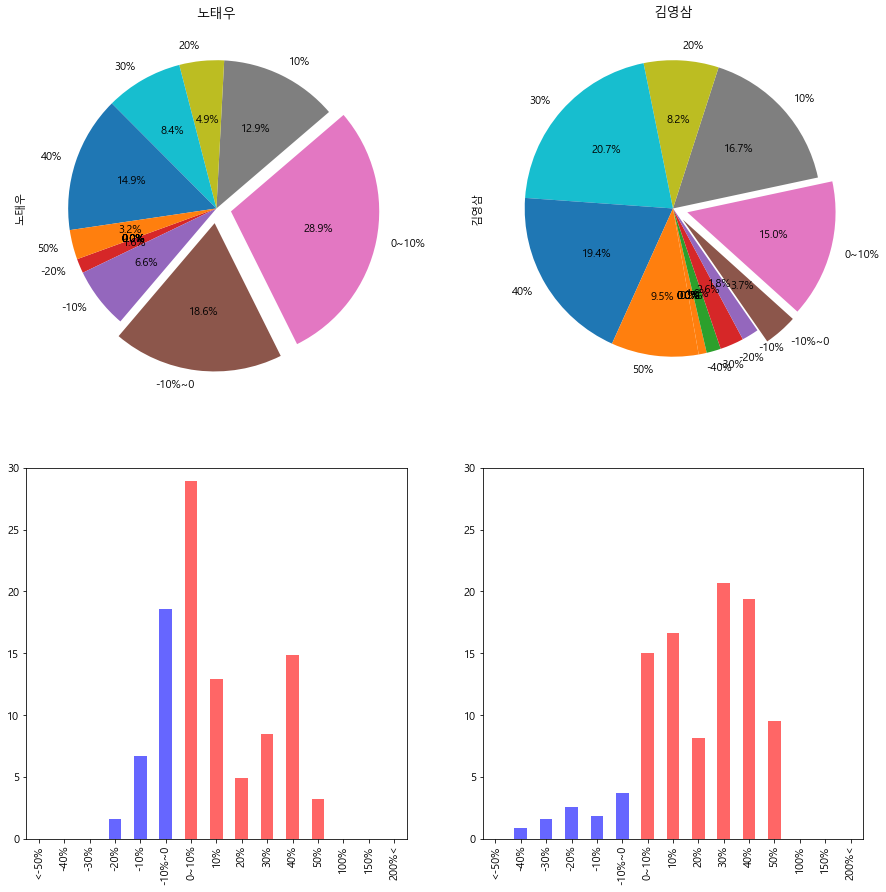

In [212]:
plt.figure(figsize=(15,15))
plt.subplot(221)
df_rate.loc['노태우'].plot.pie(autopct='%.1f%%', explode = (0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0), startangle=200)
plt.title('노태우')
plt.subplot(222)
df_rate.loc['김영삼'].plot.pie(autopct='%.1f%%', explode = (0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0), startangle=280)
plt.title('김영삼')
plt.subplot(223)
df_rate.loc['노태우'].plot.bar(rot=90, ylim=(0,30), color=['blue','blue','blue','blue','blue','blue','red','red','red','red','red','red'],alpha=0.6)
plt.subplot(224)
df_rate.loc['김영삼'].plot.bar(rot=90, ylim=(0,30), color=['blue','blue','blue','blue','blue','blue','red','red','red','red','red','red'],alpha=0.6)
plt.show()

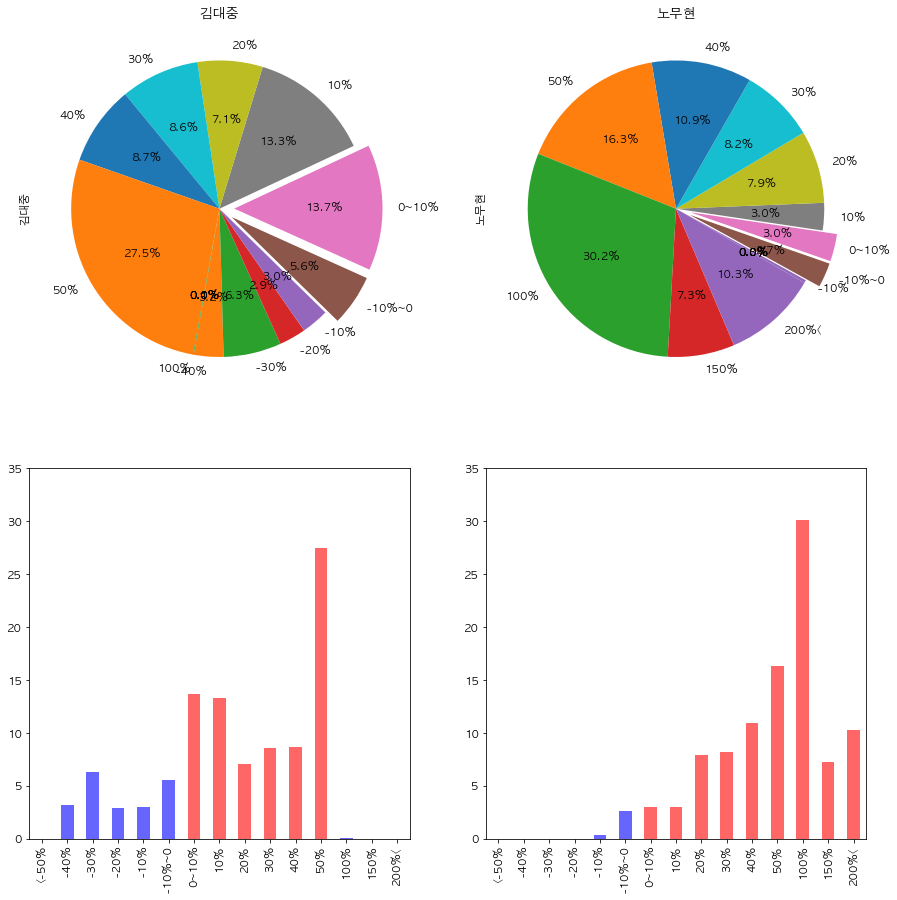

In [69]:
plt.figure(figsize=(15,15))
plt.subplot(221)
df_rate.loc['김대중'].plot.pie(autopct='%.1f%%', explode = (0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0), startangle=260)
plt.title('김대중')
plt.subplot(222)
df_rate.loc['노무현'].plot.pie(autopct='%.1f%%', explode = (0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0), startangle=330)
plt.title('노무현')
plt.subplot(223)
df_rate.loc['김대중'].plot.bar(rot=90, ylim=(0,35), color=['blue','blue','blue','blue','blue','blue','red','red','red','red','red','red'],alpha=0.6)
plt.subplot(224)
df_rate.loc['노무현'].plot.bar(rot=90, ylim=(0,35), color=['blue','blue','blue','blue','blue','blue','red','red','red','red','red','red','red','red','red'],alpha=0.6)

plt.show()

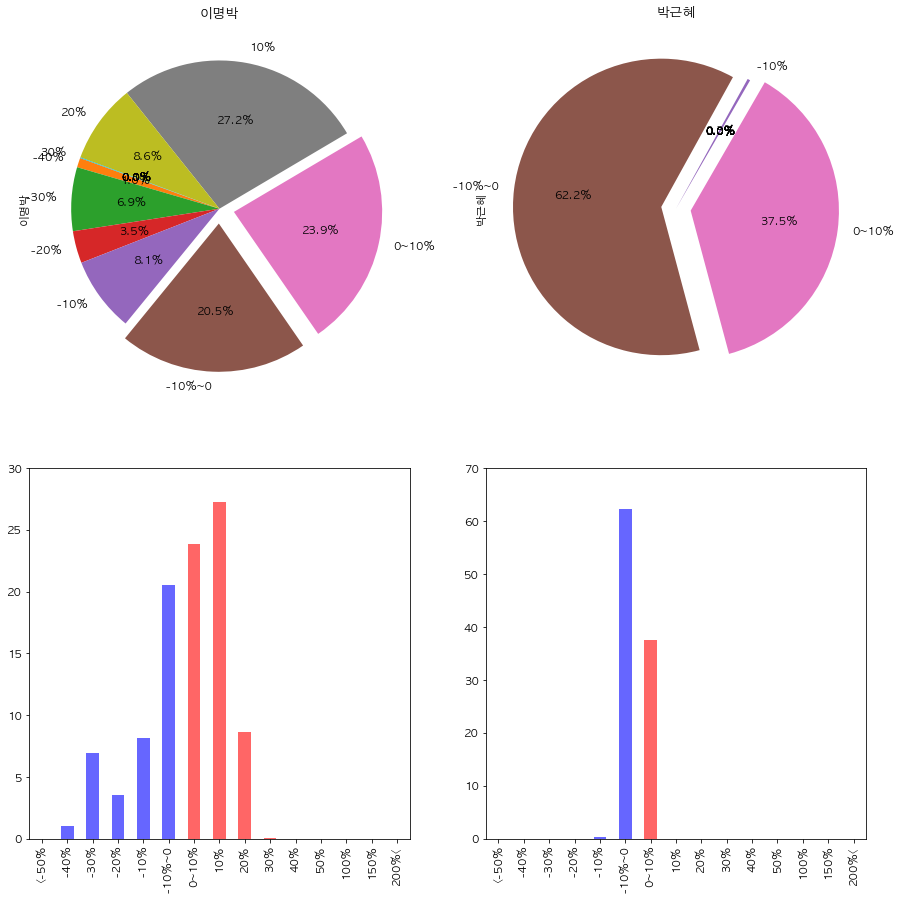

In [72]:
plt.figure(figsize=(15,15))
plt.subplot(221)
df_rate.loc['이명박'].plot.pie(autopct='%.1f%%', explode = (0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0), startangle=160)
plt.title('이명박')
plt.subplot(222)
df_rate.loc['박근혜'].plot.pie(autopct='%.1f%%', explode = (0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0), startangle=60)
plt.title('박근혜')
plt.subplot(223)
df_rate.loc['이명박'].plot.bar(rot=90, ylim=(0,30), color=['blue','blue','blue','blue','blue','blue','red','red','red','red','red','red'],alpha=0.6)
plt.subplot(224)
df_rate.loc['박근혜'].plot.bar(rot=90, ylim=(0,70), color=['blue','blue','blue','blue','blue','blue','red','red','red','red','red','red','red','red','red'],alpha=0.6)

# plt.suptitle('대통령 재임기간 수익률 구간별 영업일 비율')
plt.show()

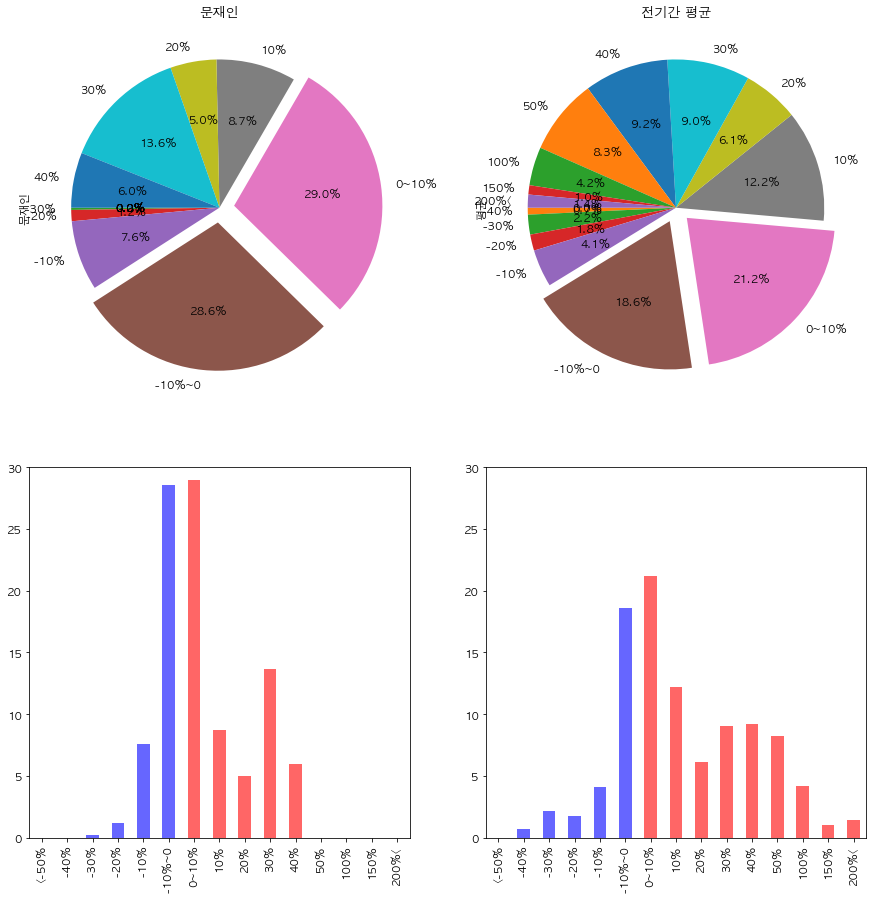

In [75]:
plt.figure(figsize=(15,15))
plt.subplot(221)
df_rate.loc['문재인'].plot.pie(autopct='%.1f%%', explode = (0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0), startangle=180)
plt.title('문재인')
plt.subplot(222)
df_rate.loc['평균'].plot.pie(autopct='%.1f%%', explode = (0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0), startangle=180)
plt.title('전기간 평균')
plt.subplot(223)
df_rate.loc['문재인'].plot.bar(rot=90, ylim=(0,30), color=['blue','blue','blue','blue','blue','blue','red','red','red','red','red','red'],alpha=0.6)
plt.subplot(224)
df_rate.loc['평균'].plot.bar(rot=90, ylim=(0,30), color=['blue','blue','blue','blue','blue','blue','red','red','red','red','red','red','red','red','red'],alpha=0.6)

# plt.suptitle('대통령 재임기간 수익률 구간별 영업일 비율')
plt.show()

### 대통령 펀드 가입 후 주가 방향은?

1. 대통령이 매수하면 주가가 오르는가?
2. 언제 고점을 찍는가? (언제 팔아야 하는가?)

이명박은 2008-11-25 주식 투자 권유  
문재인은 2019년 8월 26일에'필승코리아펀드'에 5000만 원 투자. 2021년 1월 15일에도 투자


In [189]:
fund = [ ['김대중','1998-02-23'],['노무현','2005-07-22'], ['이명박','2008-12-01'],['문재인','2019-08-26'] ]

In [190]:
for i in fund:
    temp = df_kospi.loc[i[1]]['Close']
    i.append(temp)
fund

[['김대중', '1998-02-23', 543.06],
 ['노무현', '2005-07-22', 1074.22],
 ['이명박', '2008-12-01', 1058.62],
 ['문재인', '2019-08-26', 1916.31]]

In [191]:
# 임기 내 고점, 저점 출력
# df_all.loc[df_all.loc[:,'김대중'].idxmax()][['김대중date','김대중']]
fund_date = []
fund_max = []
for i in [5,7,9,13]:
    a = df_all.loc[df_all.iloc[:,i].idxmax()][[i-1]]
    b = df_all.loc[df_all.iloc[:,i].idxmax()][[i]]
    fund_date.append(a[0])
    fund_max.append(b[0])
    
president_max = list(zip(fund_date, fund_max))
president_max

[(Timestamp('2000-01-04 00:00:00'), 1059.04),
 (Timestamp('2007-10-31 00:00:00'), 2064.85),
 (Timestamp('2011-05-02 00:00:00'), 2228.96),
 (Timestamp('2021-07-06 00:00:00'), 3305.21)]

In [192]:
df_tmp1 = pd.DataFrame(fund)
df_tmp2 = pd.DataFrame(president_max)
df_fund = pd.concat([df_tmp1, df_tmp2], axis=1)
df_fund.columns=['대통령','구입일','구입일종가','고점일','고점일종가']
df_fund

,대통령,구입일,구입일종가,고점일,고점일종가
0,김대중,1998-02-23,543.06,2000-01-04,1059.04
1,노무현,2005-07-22,1074.22,2007-10-31,2064.85
2,이명박,2008-12-01,1058.62,2011-05-02,2228.96
3,문재인,2019-08-26,1916.31,2021-07-06,3305.21


In [193]:
# 구입일을 날짜형식으로 변환 
df_fund['구입일'] = pd.to_datetime(df_fund['구입일'])

In [194]:
df_fund['고점도달기간'] = df_fund['고점일'] - df_fund['구입일']

In [195]:
df_fund['수익률(%)'] = round( (df_fund['고점일종가']- df_fund['구입일종가']) / df_fund['구입일종가'] * 100, 0)

In [196]:
df_fund

,대통령,구입일,구입일종가,고점일,고점일종가,고점도달기간,수익률(%)
0,김대중,1998-02-23,543.06,2000-01-04,1059.04,680 days,95.0
1,노무현,2005-07-22,1074.22,2007-10-31,2064.85,831 days,92.0
2,이명박,2008-12-01,1058.62,2011-05-02,2228.96,882 days,111.0
3,문재인,2019-08-26,1916.31,2021-07-06,3305.21,680 days,72.0


In [198]:
# 구입일과 고점일 사이 최저가 날짜와 주가
for i in range(4):
    df_fund.loc[i, '저점일'] = df_kospi[df_fund.loc[i, '구입일']:df_fund.loc[i, '고점일']]['Close'].idxmin()
    df_fund.loc[i, '저점일종가'] = df_kospi[df_fund.loc[i, '구입일']:df_fund.loc[i, '고점일']]['Close'].min()

In [199]:
df_fund

,대통령,구입일,구입일종가,고점일,고점일종가,고점도달기간,수익률(%),저점일,저점일종가
0,김대중,1998-02-23,543.06,2000-01-04,1059.04,680 days,95.0,1998-06-16,280.00
1,노무현,2005-07-22,1074.22,2007-10-31,2064.85,831 days,92.0,2005-08-29,1063.16
2,이명박,2008-12-01,1058.62,2011-05-02,2228.96,882 days,111.0,2008-12-04,1006.54
3,문재인,2019-08-26,1916.31,2021-07-06,3305.21,680 days,72.0,2020-03-19,1457.64


In [200]:
df_fund['저점일수익률(%)'] = round( (df_fund['저점일종가']-df_fund['구입일종가'])/df_fund['구입일종가'] * 100, 0)
df_fund

,대통령,구입일,구입일종가,고점일,고점일종가,고점도달기간,수익률(%),저점일,저점일종가,저점일수익률(%)
0,김대중,1998-02-23,543.06,2000-01-04,1059.04,680 days,95.0,1998-06-16,280.00,-48.0
1,노무현,2005-07-22,1074.22,2007-10-31,2064.85,831 days,92.0,2005-08-29,1063.16,-1.0
2,이명박,2008-12-01,1058.62,2011-05-02,2228.96,882 days,111.0,2008-12-04,1006.54,-5.0
3,문재인,2019-08-26,1916.31,2021-07-06,3305.21,680 days,72.0,2020-03-19,1457.64,-24.0


In [201]:
# 최고점 1년 후 수익률
# 1년을 더한 날짜가 영업일이 아닐 수 있음

df_fund['고점1년후'] = df_fund['고점일']+timedelta(days=365)
df_fund

,대통령,구입일,구입일종가,고점일,고점일종가,고점도달기간,수익률(%),저점일,저점일종가,저점일수익률(%),고점1년후
0,김대중,1998-02-23,543.06,2000-01-04,1059.04,680 days,95.0,1998-06-16,280.00,-48.0,2001-01-03
1,노무현,2005-07-22,1074.22,2007-10-31,2064.85,831 days,92.0,2005-08-29,1063.16,-1.0,2008-10-30
2,이명박,2008-12-01,1058.62,2011-05-02,2228.96,882 days,111.0,2008-12-04,1006.54,-5.0,2012-05-01
3,문재인,2019-08-26,1916.31,2021-07-06,3305.21,680 days,72.0,2020-03-19,1457.64,-24.0,2022-07-06


In [202]:
# 영업일로 수정(문재인은 고점 후 1년 안 됨)
df_fund.loc[2,'고점1년후'] = datetime.strptime('2012-05-02','%Y-%m-%d')
df_fund.loc[3,'고점1년후'] = datetime.strptime('2022-05-26','%Y-%m-%d')
df_fund

,대통령,구입일,구입일종가,고점일,고점일종가,고점도달기간,수익률(%),저점일,저점일종가,저점일수익률(%),고점1년후
0,김대중,1998-02-23,543.06,2000-01-04,1059.04,680 days,95.0,1998-06-16,280.00,-48.0,2001-01-03
1,노무현,2005-07-22,1074.22,2007-10-31,2064.85,831 days,92.0,2005-08-29,1063.16,-1.0,2008-10-30
2,이명박,2008-12-01,1058.62,2011-05-02,2228.96,882 days,111.0,2008-12-04,1006.54,-5.0,2012-05-02
3,문재인,2019-08-26,1916.31,2021-07-06,3305.21,680 days,72.0,2020-03-19,1457.64,-24.0,2022-05-26


In [203]:
# 고점 1년 후 종가
# 인덱스가 달라 붙지 않으니 인덱스 초기화 후 컬럼으로 붙임
temp = df_kospi.loc[ df_fund.loc[:,'고점1년후']]['Close']
temp.index = list(range(4))
df_fund['고점1년후종가'] = temp
df_fund

,대통령,구입일,구입일종가,고점일,고점일종가,고점도달기간,수익률(%),저점일,저점일종가,저점일수익률(%),고점1년후,고점1년후종가
0,김대중,1998-02-23,543.06,2000-01-04,1059.04,680 days,95.0,1998-06-16,280.00,-48.0,2001-01-03,521.43
1,노무현,2005-07-22,1074.22,2007-10-31,2064.85,831 days,92.0,2005-08-29,1063.16,-1.0,2008-10-30,1084.72
2,이명박,2008-12-01,1058.62,2011-05-02,2228.96,882 days,111.0,2008-12-04,1006.54,-5.0,2012-05-02,1999.07
3,문재인,2019-08-26,1916.31,2021-07-06,3305.21,680 days,72.0,2020-03-19,1457.64,-24.0,2022-05-26,2612.45


In [204]:
# 고점1년 후 수익률
df_fund['고점1년후수익률(%)'] = round( (df_fund['고점1년후종가']-df_fund['구입일종가'])/df_fund['구입일종가'] * 100, 0)
df_fund

,대통령,구입일,구입일종가,고점일,고점일종가,고점도달기간,수익률(%),저점일,저점일종가,저점일수익률(%),고점1년후,고점1년후종가,고점1년후수익률(%)
0,김대중,1998-02-23,543.06,2000-01-04,1059.04,680 days,95.0,1998-06-16,280.00,-48.0,2001-01-03,521.43,-4.0
1,노무현,2005-07-22,1074.22,2007-10-31,2064.85,831 days,92.0,2005-08-29,1063.16,-1.0,2008-10-30,1084.72,1.0
2,이명박,2008-12-01,1058.62,2011-05-02,2228.96,882 days,111.0,2008-12-04,1006.54,-5.0,2012-05-02,1999.07,89.0
3,문재인,2019-08-26,1916.31,2021-07-06,3305.21,680 days,72.0,2020-03-19,1457.64,-24.0,2022-05-26,2612.45,36.0


In [210]:
df_fund.to_csv('대통령펀드투자.csv', encoding='cp949')

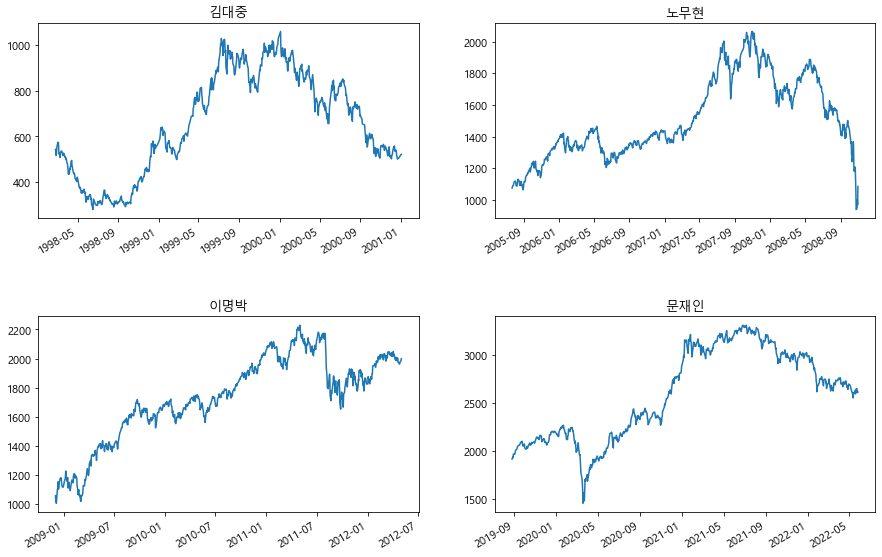

In [208]:
# 구입일과 고점1년후 사이 주가 그래프 
# 간격 조정 subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)


for i in range(4):
    plt.subplot(221+i)
    df_kospi_fund = df_kospi[df_fund.loc[i, '구입일']:df_fund.loc[i, '고점1년후']]['Close']
    df_kospi_fund.plot(xlabel='')
    plt.title(df_fund.loc[i, '대통령'])
plt.show()

In [ ]:
# 주가 그래프 그리고, 최저점과 최고점을 마커로 찍기

In [214]:
6.15+9.02+9.19+8.26+4.19+1.01+1.42

39.239999999999995

In [153]:
# 문자열을 날짜형식으로 변환
datetime.datetime.strptime(fund[0][1],'%Y-%m-%d')

datetime.datetime(1998, 2, 23, 0, 0)